In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras.models as models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation

In [ ]:
load_data

<function keras.src.datasets.mnist.load_data(path='mnist.npz')>

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
X_train.shape
#

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

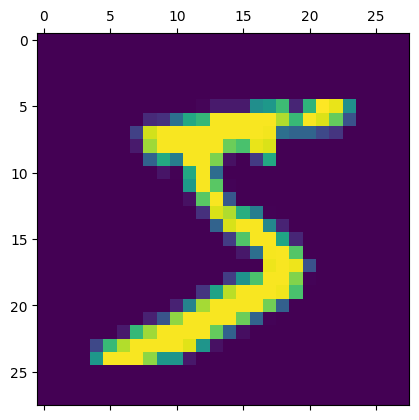

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train_sub,x_test_sub,y_train_sub,y_test_sub = train_test_split(X_train,y_train,test_size=0.2)






In [ ]:
x_train_sub[0].shape

(28, 28)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 activation_1 (Activation)   (None, 9, 9, 32)          0         
                                                      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_sub,y_train_sub,epochs=10,validation_data=(x_test_sub,y_test_sub),verbose=1)

Epoch 1/10
1500/1500 [==============================] - 59s 38ms/step - loss: 1.0116 - accuracy: 0.6680 - val_loss: 0.2713 - val_accuracy: 0.9412
Epoch 2/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.5114 - accuracy: 0.8482 - val_loss: 0.2126 - val_accuracy: 0.9516
Epoch 3/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4253 - accuracy: 0.8751 - val_loss: 0.1695 - val_accuracy: 0.9649
Epoch 4/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3794 - accuracy: 0.8879 - val_loss: 0.1645 - val_accuracy: 0.9667
Epoch 5/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3454 - accuracy: 0.9001 - val_loss: 0.1463 - val_accuracy: 0.9676
Epoch 6/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3278 - accuracy: 0.9043 - val_loss: 0.1359 - val_accuracy: 0.9715
Epoch 7/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3075 - accuracy: 0.9119 - val_loss: 0.1433 -

In [ ]:
predc=model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [ ]:
predct=np.argmax(predc,axis=1)
predct

array([7, 2, 1, ..., 4, 8, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predct)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.72%


now lets train the same model but with very less no of training datapoints(images) and see the result.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras.models as models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation

In [ ]:
def get_image_ready(n_classes=10):
  (trainX,trainy),(_,_)=load_data()
  X=np.expand_dims(trainX,axis=-1)
  X=X.astype('float32')/255
  print(X.shape,trainy.shape)
  return [X,trainy]

In [ ]:
from numpy.random import randint
num_images=120
def select_subset_img(dataset,n_samples=num_images,n_classes=10):
  X,y=dataset
  X_list,y_list=list(),list()
  n_per_class=int(n_samples/n_classes)

  for i in range(n_classes):
    X_with_class=X[y==i]
    ix=randint(0,len(X_with_class),n_per_class)
    [X_list.append(X_with_class[j]) for j in ix]
    [y_list.append(i) for j in ix]
  return np.asarray(X_list),np.asarray(y_list)


In [ ]:
dataset=get_image_ready()


(60000, 28, 28, 1) (60000,)


In [ ]:
 X,y=select_subset_img(dataset)

In [ ]:
X.shape

(120, 28, 28, 1)

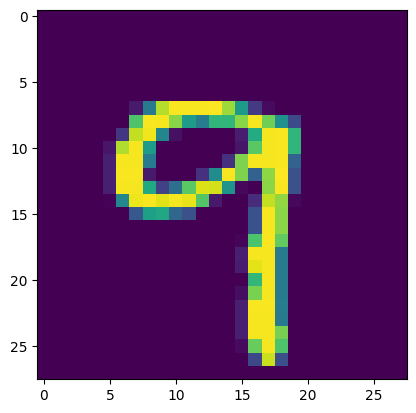

In [ ]:
i=randint(0,X.shape[0])
plt.imshow(X[i])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
model=Sequential()

model.add(Conv2D(32,(2,2),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(2,2),padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128,(2,2),padding='same'))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 activation_36 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        8256      
                                                                 
 activation_37 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 128)       32896     
                                                                 
 activation_38 (Activation)  (None, 28, 28, 128)       0         
                                                                 
 flatten_12 (Flatten)        (None, 100352)          

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
3/3 [==============================] - 2s 443ms/step - loss: 2.1987 - accuracy: 0.2396 - val_loss: 1.8609 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 299ms/step - loss: 1.3217 - accuracy: 0.7708 - val_loss: 0.9743 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 1s 329ms/step - loss: 0.4658 - accuracy: 0.8750 - val_loss: 0.4309 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 1s 202ms/step - loss: 0.1699 - accuracy: 0.9479 - val_loss: 0.2433 - val_accuracy: 0.9167
Epoch 5/10
3/3 [==============================] - 1s 221ms/step - loss: 0.0503 - accuracy: 0.9688 - val_loss: 0.1584 - val_accuracy: 0.9167
Epoch 6/10
3/3 [==============================] - 1s 213ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.3235 - val_accuracy: 0.8750
Epoch 7/10
3/3 [==============================] - 1s 214ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.8750
Epoch 8/10
3/3 [====

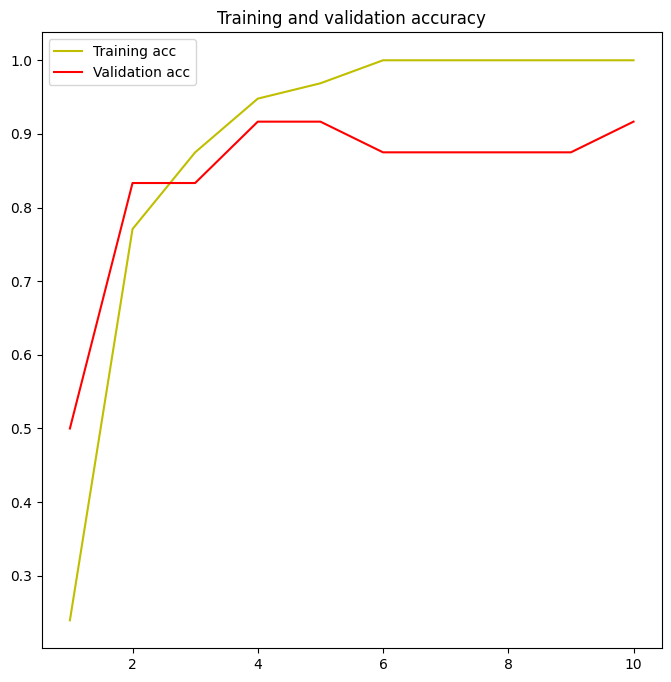

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training acc')
plt.plot(epochs,val_loss,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


In [ ]:
(_,_),(text_x,test_y)=load_data()

In [ ]:
text_x=np.expand_dims(text_x,axis=-1)
text_x=text_x.astype('float32')/255


In [ ]:
_,test_acc=model.evaluate(text_x,test_y,verbose=1)
print(f'Test Accuracy: {test_acc*100:.2f}%')

313/313 [==============================] - 15s 47ms/step - loss: 2.4575 - accuracy: 0.7721
Test Accuracy: 77.21%


On testing data the modle didnt performed that we beacuse we didnt provide the sufficient data.

Now we will try the semi supervised GAN approach with same datapoints that we used in this above odel.

# SEMI SUPERVISED GAN's

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Reshape, LeakyReLU, Conv2DTranspose, Conv2D, Flatten, Dropout, Activation, Lambda
from keras.datasets.mnist import load_data
from keras import backend as K
from tensorflow.keras.optimizers import Adam
#from numpy.random import randint, ones, zeros



In [39]:
# Generator Model
def define_generator(latent_dim):
    in_lat = Input(shape=(latent_dim,))
    n_nodes = 256 * 7 * 7
    x = Dense(n_nodes)(in_lat)
    x = LeakyReLU(alpha=0.2)(x)
    x = Reshape((7, 7, 256))(x)

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)

    out_layer = Conv2DTranspose(1, (3, 3), padding='same', strides=(2, 2), activation='tanh')(x)

    model = Model(in_lat, out_layer)
    return model


In [40]:
# Custom Activation for Unsupervised Discriminator
def custom_activation(x):
    Z_x = K.sum(K.exp(x), axis=1, keepdims=True)
    D_x = Z_x / (Z_x + 1)
    return D_x


# Discriminator Model
def define_discriminator(in_shape=(28, 28, 1), n_classes=10):
    in_image = Input(shape=in_shape)
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(in_image)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(n_classes)(x)

    # Supervised Output
    c_out_layer = Activation('softmax')(x)
    c_model = Model(in_image, c_out_layer)
    c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

    # Unsupervised Output
    d_out_layer = Lambda(custom_activation)(x)
    d_model = Model(in_image, d_out_layer)
    d_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

    return d_model, c_model



In [41]:
# Define GAN Model
def define_gan(gen_model, disc_unsup):
    disc_unsup.trainable = False
    gan_output = disc_unsup(gen_model.output)
    model = Model(gen_model.input, gan_output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Load and Preprocess Data
def load_real_samples():
    (trainX, trainy), (_, _) = load_data()
    X = np.expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5  # Normalize to [-1, 1]
    return [X, trainy]

# Select Supervised Samples
def select_supervised_samples(dataset, n_samples=100, n_classes=10):
    X, y = dataset
    X_list, y_list = list(), list()
    n_per_class = int(n_samples / n_classes)

    for i in range(n_classes):
        X_with_class = X[y == i]
        ix = randint(0, len(X_with_class), n_per_class)
        [X_list.append(X_with_class[j]) for j in ix]
        [y_list.append(i) for j in ix]
    return np.asarray(X_list), np.asarray(y_list)



In [44]:
# Take Real Samples
def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    y = ones((n_samples, 1))
    return [X, labels], y

# Generate Latent Points
def generate_latent_points(latent_dim, n_samples):
    z_input = np.random.randn(latent_dim * n_samples)
    z_input = z_input.reshape(n_samples, latent_dim)
    return z_input

# Generate Fake Samples
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    fake_images = generator.predict(z_input)
    y = zeros((n_samples, 1))
    return fake_images, y

# Summarize Performance
def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples=100):
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X + 1) / 2.0  # Rescale to [0, 1]

    for i in range(n_samples):
        plt.subplot(10, 10, 1 + i)
        plt.axis('off')
        plt.imshow(X[i, :, :, 0], cmap='gray_r')
    filename1 = 'generated_images_%03d.png' % (step + 1)
    plt.savefig(filename1)
    plt.close()

    X, y = dataset
    _, acc = c_model.evaluate(X, y, verbose=0)
    print("Discriminator accuracy: %.3f%%" % (acc * 100))

    filename2 = "gen_model_%04d.h5" % (step + 1)
    g_model.save(filename2)

    filename3 = "disc_sup_model_%04d.h5" % (step + 1)
    c_model.save(filename3)

    print("Saved: %s, %s, and %s" % (filename1, filename2, filename3))



In [45]:
# Training Function
def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=100):
    X_sup, y_sup = select_supervised_samples(dataset)
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    half_batch = int(n_batch / 2)
    print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))

    for i in range(n_steps):
        [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
        c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)

        [X_real, _], y_real = generate_real_samples(dataset, half_batch)
        d_loss1 = d_model.train_on_batch(X_real, y_real)

        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)

        X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(X_gan, y_gan)

        print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (i + 1, c_loss, c_acc * 100, d_loss1, d_loss2, g_loss))

        if (i + 1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, c_model, latent_dim, dataset)

# Main Execution
latent_dim = 100
d_model, c_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples()

train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=10)

n_epochs=10, n_batch=100, 1/2=50, b/e=600, steps=6000
2/2 [==============================] - 0s 35ms/step
>1, c[2.319,8], d[0.094,2.400], g[0.095]
2/2 [==============================] - 0s 35ms/step
>2, c[2.309,10], d[0.091,2.400], g[0.095]
2/2 [==============================] - 0s 40ms/step
>3, c[2.298,12], d[0.089,2.399], g[0.095]
2/2 [==============================] - 0s 41ms/step
>4, c[2.284,14], d[0.086,2.397], g[0.096]
2/2 [==============================] - 0s 36ms/step
>5, c[2.284,16], d[0.084,2.396], g[0.096]
2/2 [==============================] - 0s 35ms/step
>6, c[2.274,18], d[0.080,2.397], g[0.096]
2/2 [==============================] - 0s 56ms/step
>7, c[2.276,14], d[0.077,2.399], g[0.096]
2/2 [==============================] - 0s 57ms/step
>8, c[2.260,20], d[0.073,2.403], g[0.095]
2/2 [==============================] - 0s 62ms/step
>9, c[2.280,8], d[0.071,2.407], g[0.095]
2/2 [==============================] - 0s 40ms/step
>10, c[2.255,18], d[0.070,2.410], g[0.095]
2/2 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Discriminator accuracy: 78.092%
Saved: generated_images_600.png, gen_model_0600.h5, and disc_sup_model_0600.h5
2/2 [==============================] - 0s 41ms/step
>601, c[0.089,100], d[0.857,1.197], g[0.920]
2/2 [==============================] - 0s 47ms/step
>602, c[0.042,100], d[0.847,0.936], g[1.058]
2/2 [==============================] - 0s 55ms/step
>603, c[0.078,100], d[0.904,0.921], g[1.140]
2/2 [==============================] - 0s 40ms/step
>604, c[0.067,100], d[0.916,0.921], g[1.015]
2/2 [==============================] - 0s 52ms/step
>605, c[0.092,100], d[0.966,0.997], g[0.931]
2/2 [==============================] - 0s 35ms/step
>606, c[0.098,100], d[1.044,0.882], g[0.876]
2/2 [==============================] - 0s 37ms/step
>607, c[0.054,100], d[0.947,1.023], g[0.915]
2/2 [==============================] - 0s 35ms/step
>608, c[0.089,100], d[0.859,1.054], g[0.951]
2/2 [==============================] - 0s 37ms/step
>609, c[0.065,100], d[1.035,1.041], g[0.988]
2/2 [===========

Discriminator accuracy: 86.225%
Saved: generated_images_1200.png, gen_model_1200.h5, and disc_sup_model_1200.h5
2/2 [==============================] - 0s 56ms/step
>1201, c[0.022,100], d[0.923,1.057], g[1.074]
2/2 [==============================] - 0s 57ms/step
>1202, c[0.032,100], d[0.812,0.856], g[1.006]
2/2 [==============================] - 0s 56ms/step
>1203, c[0.035,100], d[0.702,0.837], g[1.042]
2/2 [==============================] - 0s 37ms/step
>1204, c[0.022,100], d[0.690,1.002], g[1.113]
2/2 [==============================] - 0s 39ms/step
>1205, c[0.031,100], d[0.878,0.815], g[1.207]
2/2 [==============================] - 0s 37ms/step
>1206, c[0.020,100], d[0.796,0.862], g[1.147]
2/2 [==============================] - 0s 36ms/step
>1207, c[0.029,100], d[0.889,0.707], g[1.110]
2/2 [==============================] - 0s 37ms/step
>1208, c[0.024,100], d[1.006,1.034], g[1.008]
2/2 [==============================] - 0s 36ms/step
>1209, c[0.050,100], d[0.757,0.910], g[0.805]
2/2 [=

Discriminator accuracy: 89.678%
Saved: generated_images_1800.png, gen_model_1800.h5, and disc_sup_model_1800.h5
2/2 [==============================] - 0s 37ms/step
>1801, c[0.050,98], d[0.583,0.892], g[1.090]
2/2 [==============================] - 0s 37ms/step
>1802, c[0.008,100], d[0.715,1.073], g[0.928]
2/2 [==============================] - 0s 39ms/step
>1803, c[0.012,100], d[0.840,1.013], g[0.993]
2/2 [==============================] - 0s 37ms/step
>1804, c[0.040,98], d[0.748,0.990], g[1.148]
2/2 [==============================] - 0s 40ms/step
>1805, c[0.015,100], d[0.610,0.657], g[1.211]
2/2 [==============================] - 0s 38ms/step
>1806, c[0.042,100], d[0.866,0.638], g[1.187]
2/2 [==============================] - 0s 37ms/step
>1807, c[0.030,100], d[0.994,0.938], g[1.197]
2/2 [==============================] - 0s 41ms/step
>1808, c[0.060,98], d[0.825,0.812], g[1.333]
2/2 [==============================] - 0s 39ms/step
>1809, c[0.028,98], d[1.023,0.839], g[1.084]
2/2 [=====

Discriminator accuracy: 90.738%
Saved: generated_images_2400.png, gen_model_2400.h5, and disc_sup_model_2400.h5
2/2 [==============================] - 0s 36ms/step
>2401, c[0.016,100], d[0.706,0.828], g[1.274]
2/2 [==============================] - 0s 39ms/step
>2402, c[0.008,100], d[0.589,0.888], g[1.293]
2/2 [==============================] - 0s 42ms/step
>2403, c[0.011,100], d[0.879,0.863], g[1.191]
2/2 [==============================] - 0s 38ms/step
>2404, c[0.020,100], d[0.863,0.705], g[1.179]
2/2 [==============================] - 0s 49ms/step
>2405, c[0.015,100], d[0.809,0.719], g[1.262]
2/2 [==============================] - 0s 63ms/step
>2406, c[0.016,100], d[0.791,0.750], g[1.320]
2/2 [==============================] - 0s 57ms/step
>2407, c[0.009,100], d[0.838,0.813], g[1.244]
2/2 [==============================] - 0s 37ms/step
>2408, c[0.011,100], d[0.825,0.825], g[1.046]
2/2 [==============================] - 0s 35ms/step
>2409, c[0.005,100], d[0.806,0.759], g[1.105]
2/2 [=

Discriminator accuracy: 92.173%
Saved: generated_images_3000.png, gen_model_3000.h5, and disc_sup_model_3000.h5
2/2 [==============================] - 0s 38ms/step
>3001, c[0.014,100], d[0.698,0.961], g[1.126]
2/2 [==============================] - 0s 38ms/step
>3002, c[0.010,100], d[0.746,0.797], g[1.195]
2/2 [==============================] - 0s 38ms/step
>3003, c[0.008,100], d[0.955,1.015], g[1.081]
2/2 [==============================] - 0s 41ms/step
>3004, c[0.017,100], d[0.879,1.002], g[1.222]
2/2 [==============================] - 0s 39ms/step
>3005, c[0.008,100], d[0.671,0.835], g[1.073]
2/2 [==============================] - 0s 38ms/step
>3006, c[0.011,100], d[0.926,0.725], g[1.188]
2/2 [==============================] - 0s 37ms/step
>3007, c[0.008,100], d[1.037,0.747], g[0.995]
2/2 [==============================] - 0s 42ms/step
>3008, c[0.024,100], d[0.748,0.865], g[1.176]
2/2 [==============================] - 0s 40ms/step
>3009, c[0.008,100], d[0.473,0.861], g[1.225]
2/2 [=

Discriminator accuracy: 91.238%
Saved: generated_images_3600.png, gen_model_3600.h5, and disc_sup_model_3600.h5
2/2 [==============================] - 0s 48ms/step
>3601, c[0.009,100], d[0.876,1.103], g[1.217]
2/2 [==============================] - 0s 38ms/step
>3602, c[0.008,100], d[0.899,0.656], g[1.193]
2/2 [==============================] - 0s 39ms/step
>3603, c[0.005,100], d[0.843,0.846], g[1.080]
2/2 [==============================] - 0s 49ms/step
>3604, c[0.015,100], d[0.748,0.844], g[0.976]
2/2 [==============================] - 0s 55ms/step
>3605, c[0.006,100], d[0.871,0.853], g[1.032]
2/2 [==============================] - 0s 54ms/step
>3606, c[0.003,100], d[0.870,0.755], g[1.190]
2/2 [==============================] - 0s 41ms/step
>3607, c[0.005,100], d[0.539,0.843], g[1.189]
2/2 [==============================] - 0s 39ms/step
>3608, c[0.004,100], d[0.650,0.845], g[1.171]
2/2 [==============================] - 0s 41ms/step
>3609, c[0.009,100], d[0.809,0.785], g[1.231]
2/2 [=

Discriminator accuracy: 91.773%
Saved: generated_images_4200.png, gen_model_4200.h5, and disc_sup_model_4200.h5
2/2 [==============================] - 0s 39ms/step
>4201, c[0.007,100], d[0.682,0.944], g[1.080]
2/2 [==============================] - 0s 39ms/step
>4202, c[0.011,100], d[0.585,0.858], g[1.114]
2/2 [==============================] - 0s 38ms/step
>4203, c[0.002,100], d[0.796,1.006], g[1.350]
2/2 [==============================] - 0s 44ms/step
>4204, c[0.005,100], d[0.976,0.687], g[1.240]
2/2 [==============================] - 0s 38ms/step
>4205, c[0.007,100], d[0.752,0.700], g[1.268]
2/2 [==============================] - 0s 39ms/step
>4206, c[0.005,100], d[0.870,1.009], g[1.108]
2/2 [==============================] - 0s 61ms/step
>4207, c[0.005,100], d[0.942,0.803], g[1.208]
2/2 [==============================] - 0s 58ms/step
>4208, c[0.006,100], d[0.816,1.023], g[1.081]
2/2 [==============================] - 0s 65ms/step
>4209, c[0.005,100], d[0.829,1.001], g[1.170]
2/2 [=

Discriminator accuracy: 91.755%
Saved: generated_images_4800.png, gen_model_4800.h5, and disc_sup_model_4800.h5
2/2 [==============================] - 0s 39ms/step
>4801, c[0.007,100], d[0.739,0.912], g[1.252]
2/2 [==============================] - 0s 38ms/step
>4802, c[0.004,100], d[1.102,0.665], g[1.114]
2/2 [==============================] - 0s 40ms/step
>4803, c[0.004,100], d[0.681,0.800], g[1.112]
2/2 [==============================] - 0s 37ms/step
>4804, c[0.008,100], d[0.851,0.746], g[1.193]
2/2 [==============================] - 0s 49ms/step
>4805, c[0.006,100], d[0.816,0.874], g[0.942]
2/2 [==============================] - 0s 39ms/step
>4806, c[0.009,100], d[0.933,0.973], g[1.080]
2/2 [==============================] - 0s 43ms/step
>4807, c[0.007,100], d[0.804,1.117], g[1.060]
2/2 [==============================] - 0s 42ms/step
>4808, c[0.003,100], d[0.708,0.759], g[1.107]
2/2 [==============================] - 0s 38ms/step
>4809, c[0.005,100], d[0.892,0.929], g[1.043]
2/2 [=

Discriminator accuracy: 92.378%
Saved: generated_images_5400.png, gen_model_5400.h5, and disc_sup_model_5400.h5
2/2 [==============================] - 0s 39ms/step
>5401, c[0.002,100], d[0.856,1.057], g[1.431]
2/2 [==============================] - 0s 48ms/step
>5402, c[0.004,100], d[0.820,0.719], g[1.257]
2/2 [==============================] - 0s 38ms/step
>5403, c[0.006,100], d[0.911,0.744], g[1.056]
2/2 [==============================] - 0s 37ms/step
>5404, c[0.007,100], d[0.636,0.832], g[1.131]
2/2 [==============================] - 0s 38ms/step
>5405, c[0.003,100], d[0.685,0.927], g[1.231]
2/2 [==============================] - 0s 37ms/step
>5406, c[0.009,100], d[0.828,0.697], g[1.240]
2/2 [==============================] - 0s 64ms/step
>5407, c[0.003,100], d[0.741,0.769], g[1.166]
2/2 [==============================] - 0s 65ms/step
>5408, c[0.010,100], d[0.778,0.635], g[1.057]
2/2 [==============================] - 0s 39ms/step
>5409, c[0.003,100], d[0.788,0.754], g[1.141]
2/2 [=

Discriminator accuracy: 92.197%
Saved: generated_images_6000.png, gen_model_6000.h5, and disc_sup_model_6000.h5
Discriminator accuracy: 92.197%
Saved: generated_images_6000.png, gen_model_6000.h5, and disc_sup_model_6000.h5


In [49]:
from keras.models import load_model
disc_sup_trained_model=load_model("disc_sup_model_6000.h5")
(_,_),(testX,testy)=load_data()
testX=np.expand_dims(testX,axis=-1)

testX=testX.astype('float32')
testX=(testX-127.5)/127.5


In [50]:
y_pred=disc_sup_trained_model.predict(testX)
prediction_test=np.argmax(y_pred,axis=1)


313/313 [==============================] - 3s 9ms/step


In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testy, prediction_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.03%
